In [71]:
import pandas as pd
import seaborn as sns
import cufflinks as cf
import matplotlib as plt

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

In [73]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

5.8.0


In [74]:
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [75]:
df=pd.read_csv('C:/Users/Ambuj nayan mishra/Downloads/Algerian_forest_fires_dataset_UPDATE.csv',skiprows=1)

In [76]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


# Data cleaning

In [77]:
df.drop([122,123],inplace=True)

In [78]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

## Therefore, we can make a new column based on the Region
* 1 : Bejaia Region Dataset

* 2 : Sidi-Bel Abbes Region Dataset

In [79]:
df['Region']=1
df.Region.loc[:122]='bejaia'
df.Region.loc[122:]='Sidi-Bel Abbes'

In [80]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


# columns:

In [81]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

**Here in some of the columns are misspaced so need to remove the space to make the column name simple**

In [82]:
df.columns = [i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

# null value

In [83]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

**observation: here is one nan value in Classes column**

In [84]:
df[df['Classes'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,Sidi-Bel Abbes


In [85]:
df.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [86]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

**observation: Here in some of the values are misspaced so need to remove the space to make the values name simple**

In [87]:
df.Classes = df.Classes.str.strip()
df.Classes

0      not fire
1      not fire
2      not fire
3      not fire
4      not fire
         ...   
239        fire
240    not fire
241    not fire
242    not fire
243    not fire
Name: Classes, Length: 244, dtype: object

In [88]:
df.Classes.unique()

array(['not fire', 'fire', nan], dtype=object)

In [89]:
df.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

**observation: here most occurd value is fire so will fill nan value with fire**

In [90]:
df['Classes'].fillna('fire',inplace=True)

In [91]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

## No nan values

# Replacing the 'day','month','year' features

In [92]:
df['date']=pd.to_datetime(df[['year','month','day']])


In [93]:
df.drop(['day','month','year'],axis=1,inplace=True)
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia,2012-06-04
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes,2012-09-26
240,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes,2012-09-27
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes,2012-09-28
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes,2012-09-29


In [94]:
new_cols = ['date', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']
df=df.reindex(columns=new_cols)

In [95]:
df

,date,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,2012-06-01,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
1,2012-06-02,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia
2,2012-06-03,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
3,2012-06-04,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia
4,2012-06-05,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2012-09-26,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,2012-09-27,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,2012-09-28,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,2012-09-29,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


# Changing The DataTypes of the Columns

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         244 non-null    datetime64[ns]
 1   Temperature  244 non-null    object        
 2   RH           244 non-null    object        
 3   Ws           244 non-null    object        
 4   Rain         244 non-null    object        
 5   FFMC         244 non-null    object        
 6   DMC          244 non-null    object        
 7   DC           244 non-null    object        
 8   ISI          244 non-null    object        
 9   BUI          244 non-null    object        
 10  FWI          244 non-null    object        
 11  Classes      244 non-null    object        
 12  Region       244 non-null    object        
dtypes: datetime64[ns](1), object(12)
memory usage: 24.9+ KB


# DC column

In [97]:
# In DC column here in some values has space 
# replacing extra space with nothing
df['DC']=df.DC.replace(regex=[' '],value=[''])

In [98]:
# In DC column here some string value we have convert to float
l2 = []
for i in df.DC:
    if type(i) == str:
        k=float(i)
        l2.append(k)
    else:
        l2.append(i)
        

In [99]:
l2

[7.6,
 7.6,
 7.1,
 6.9,
 14.2,
 22.2,
 30.5,
 38.3,
 38.8,
 46.3,
 54.3,
 61.4,
 17.0,
 7.8,
 7.4,
 7.6,
 7.8,
 8.0,
 16.0,
 27.1,
 31.6,
 39.5,
 47.7,
 55.8,
 63.8,
 71.8,
 80.3,
 88.5,
 84.4,
 92.8,
 8.6,
 8.3,
 9.2,
 18.5,
 27.9,
 37.0,
 40.4,
 49.8,
 9.2,
 9.3,
 18.7,
 27.7,
 37.2,
 22.9,
 17.0,
 25.5,
 34.1,
 43.1,
 52.8,
 62.1,
 71.5,
 79.9,
 71.3,
 79.7,
 88.7,
 98.6,
 108.5,
 117.8,
 127.0,
 136.0,
 145.7,
 10.2,
 10.0,
 10.0,
 19.8,
 29.7,
 39.1,
 48.6,
 47.0,
 57.0,
 67.0,
 77.0,
 75.1,
 85.1,
 94.7,
 92.5,
 90.4,
 100.7,
 110.9,
 120.9,
 130.6,
 141.1,
 151.3,
 161.5,
 171.3,
 181.3,
 190.6,
 200.2,
 210.4,
 220.4,
 180.4,
 8.7,
 7.5,
 7.0,
 7.5,
 15.7,
 24.0,
 32.2,
 30.1,
 8.4,
 8.4,
 8.9,
 8.4,
 16.6,
 7.5,
 7.0,
 7.3,
 15.7,
 24.3,
 33.1,
 41.3,
 49.3,
 57.9,
 41.4,
 30.4,
 15.2,
 7.7,
 16.3,
 24.9,
 8.8,
 7.7,
 7.5,
 8.2,
 7.8,
 7.6,
 15.4,
 17.6,
 26.3,
 28.9,
 7.4,
 14.7,
 22.5,
 30.5,
 37.8,
 7.8,
 7.3,
 14.7,
 8.0,
 8.0,
 8.3,
 8.2,
 8.0,
 18.4,
 8.3,
 8.3,
 17.0,
 

In [100]:
df['DC'] = l2

# FWI column

In [101]:
# here are some string values we have sort it.
l3 = []
for i in df.FWI:
    if type(i) == str:
        #k=float(i)
        l3.append(i)
    else:
        #l3.append(i)
        pass

In [102]:
l3

['0.5',
 '0.4',
 '0.1',
 '0',
 '0.5',
 '2.5',
 '7.2',
 '7.1',
 '0.3',
 '0.9',
 '5.6',
 '7.1 ',
 '0.2',
 '0.4',
 '0.1',
 '0',
 '0',
 '0.2',
 '1.4',
 '0.4',
 '2.2',
 '2.3',
 '3.8',
 '7.5',
 '8.4',
 '10.6',
 '15',
 '13.9',
 '3.9',
 '12.9',
 '0.4',
 '0.3',
 '0.5',
 '1.7',
 '4.9',
 '6.8',
 '3.2',
 '8',
 '0.6',
 '0.5',
 '2.2',
 '0.9',
 '3.4',
 '0.8',
 '0.5',
 '0.4',
 '3.6',
 '6',
 '10.9',
 '4',
 '8.8',
 '2.8',
 '2.1',
 '1.3',
 '7.3',
 '15.3',
 '15.3',
 '11.3',
 '11.9',
 '10.7',
 '15.7',
 '0.9',
 '0.8',
 '0.8',
 '3.9',
 '6.1',
 '6.8',
 '8',
 '2.6',
 '9.9',
 '11.6',
 '12.1',
 '4.2',
 '10.2',
 '10.6',
 '6.3',
 '4.2',
 '14.6',
 '16.1',
 '17.2',
 '16.8',
 '18.4',
 '20.4',
 '22.3',
 '20.9',
 '20.3',
 '13.7',
 '13.2',
 '19.9',
 '30.2',
 '4.2',
 '0.3',
 '0.1',
 '0',
 '0',
 '0.5',
 '1.7',
 '0.9',
 '0.6',
 '0.4',
 '0.2',
 '0.3',
 '0.3',
 '0.5',
 '0',
 '0.1',
 '0',
 '0.8',
 '5.9',
 '7.7',
 '9.7',
 '6.3',
 '8.3',
 '2.8',
 '0.7',
 '0.7',
 '0.1',
 '1.7',
 '4.1',
 '0.9',
 '0.1',
 '0.1',
 '0.2',
 '0.2',
 '0

In [103]:
# replacing fire to 0.0
df.FWI.replace('fire   ',0.0,inplace=True)

In [104]:
l3 = []
for i in df.FWI:
    if type(i) == str:
        #k=float(i)
        l3.append(i)
    else:
        #l3.append(i)
        pass

In [105]:
l3

['0.5',
 '0.4',
 '0.1',
 '0',
 '0.5',
 '2.5',
 '7.2',
 '7.1',
 '0.3',
 '0.9',
 '5.6',
 '7.1 ',
 '0.2',
 '0.4',
 '0.1',
 '0',
 '0',
 '0.2',
 '1.4',
 '0.4',
 '2.2',
 '2.3',
 '3.8',
 '7.5',
 '8.4',
 '10.6',
 '15',
 '13.9',
 '3.9',
 '12.9',
 '0.4',
 '0.3',
 '0.5',
 '1.7',
 '4.9',
 '6.8',
 '3.2',
 '8',
 '0.6',
 '0.5',
 '2.2',
 '0.9',
 '3.4',
 '0.8',
 '0.5',
 '0.4',
 '3.6',
 '6',
 '10.9',
 '4',
 '8.8',
 '2.8',
 '2.1',
 '1.3',
 '7.3',
 '15.3',
 '15.3',
 '11.3',
 '11.9',
 '10.7',
 '15.7',
 '0.9',
 '0.8',
 '0.8',
 '3.9',
 '6.1',
 '6.8',
 '8',
 '2.6',
 '9.9',
 '11.6',
 '12.1',
 '4.2',
 '10.2',
 '10.6',
 '6.3',
 '4.2',
 '14.6',
 '16.1',
 '17.2',
 '16.8',
 '18.4',
 '20.4',
 '22.3',
 '20.9',
 '20.3',
 '13.7',
 '13.2',
 '19.9',
 '30.2',
 '4.2',
 '0.3',
 '0.1',
 '0',
 '0',
 '0.5',
 '1.7',
 '0.9',
 '0.6',
 '0.4',
 '0.2',
 '0.3',
 '0.3',
 '0.5',
 '0',
 '0.1',
 '0',
 '0.8',
 '5.9',
 '7.7',
 '9.7',
 '6.3',
 '8.3',
 '2.8',
 '0.7',
 '0.7',
 '0.1',
 '1.7',
 '4.1',
 '0.9',
 '0.1',
 '0.1',
 '0.2',
 '0.2',
 '0

In [106]:
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['DC']=df['DC'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['FWI']=df['FWI'].astype(float)
df['Ws']=df['Ws'].astype(int)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         244 non-null    datetime64[ns]
 1   Temperature  244 non-null    int32         
 2   RH           244 non-null    int32         
 3   Ws           244 non-null    int32         
 4   Rain         244 non-null    float64       
 5   FFMC         244 non-null    float64       
 6   DMC          244 non-null    float64       
 7   DC           244 non-null    float64       
 8   ISI          244 non-null    float64       
 9   BUI          244 non-null    float64       
 10  FWI          244 non-null    float64       
 11  Classes      244 non-null    object        
 12  Region       244 non-null    object        
dtypes: datetime64[ns](1), float64(7), int32(3), object(2)
memory usage: 22.0+ KB


In [108]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 11 numerical features : ['date', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

We have 2 categorical features : ['Classes', 'Region']


Feature Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

Weather data observations

2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

3. RH : Relative Humidity in %: 21 to 90

4. Ws : Wind speed in km/h: 6 to 29

5. Rain: total day in mm: 0 to 16.8

FWI Components

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

8. Drought Code (DC) index from the FWI system: 7 to 220.4

9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

10. Buildup Index (BUI) index from the FWI system: 1.1 to 68

11. Fire Weather Index (FWI) Index: 0 to 31.1

12. Classes: two classes, namely Fire and not Fire

In [109]:
df[numeric_features].describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.006557
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.438889
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


# Univariate Analysis

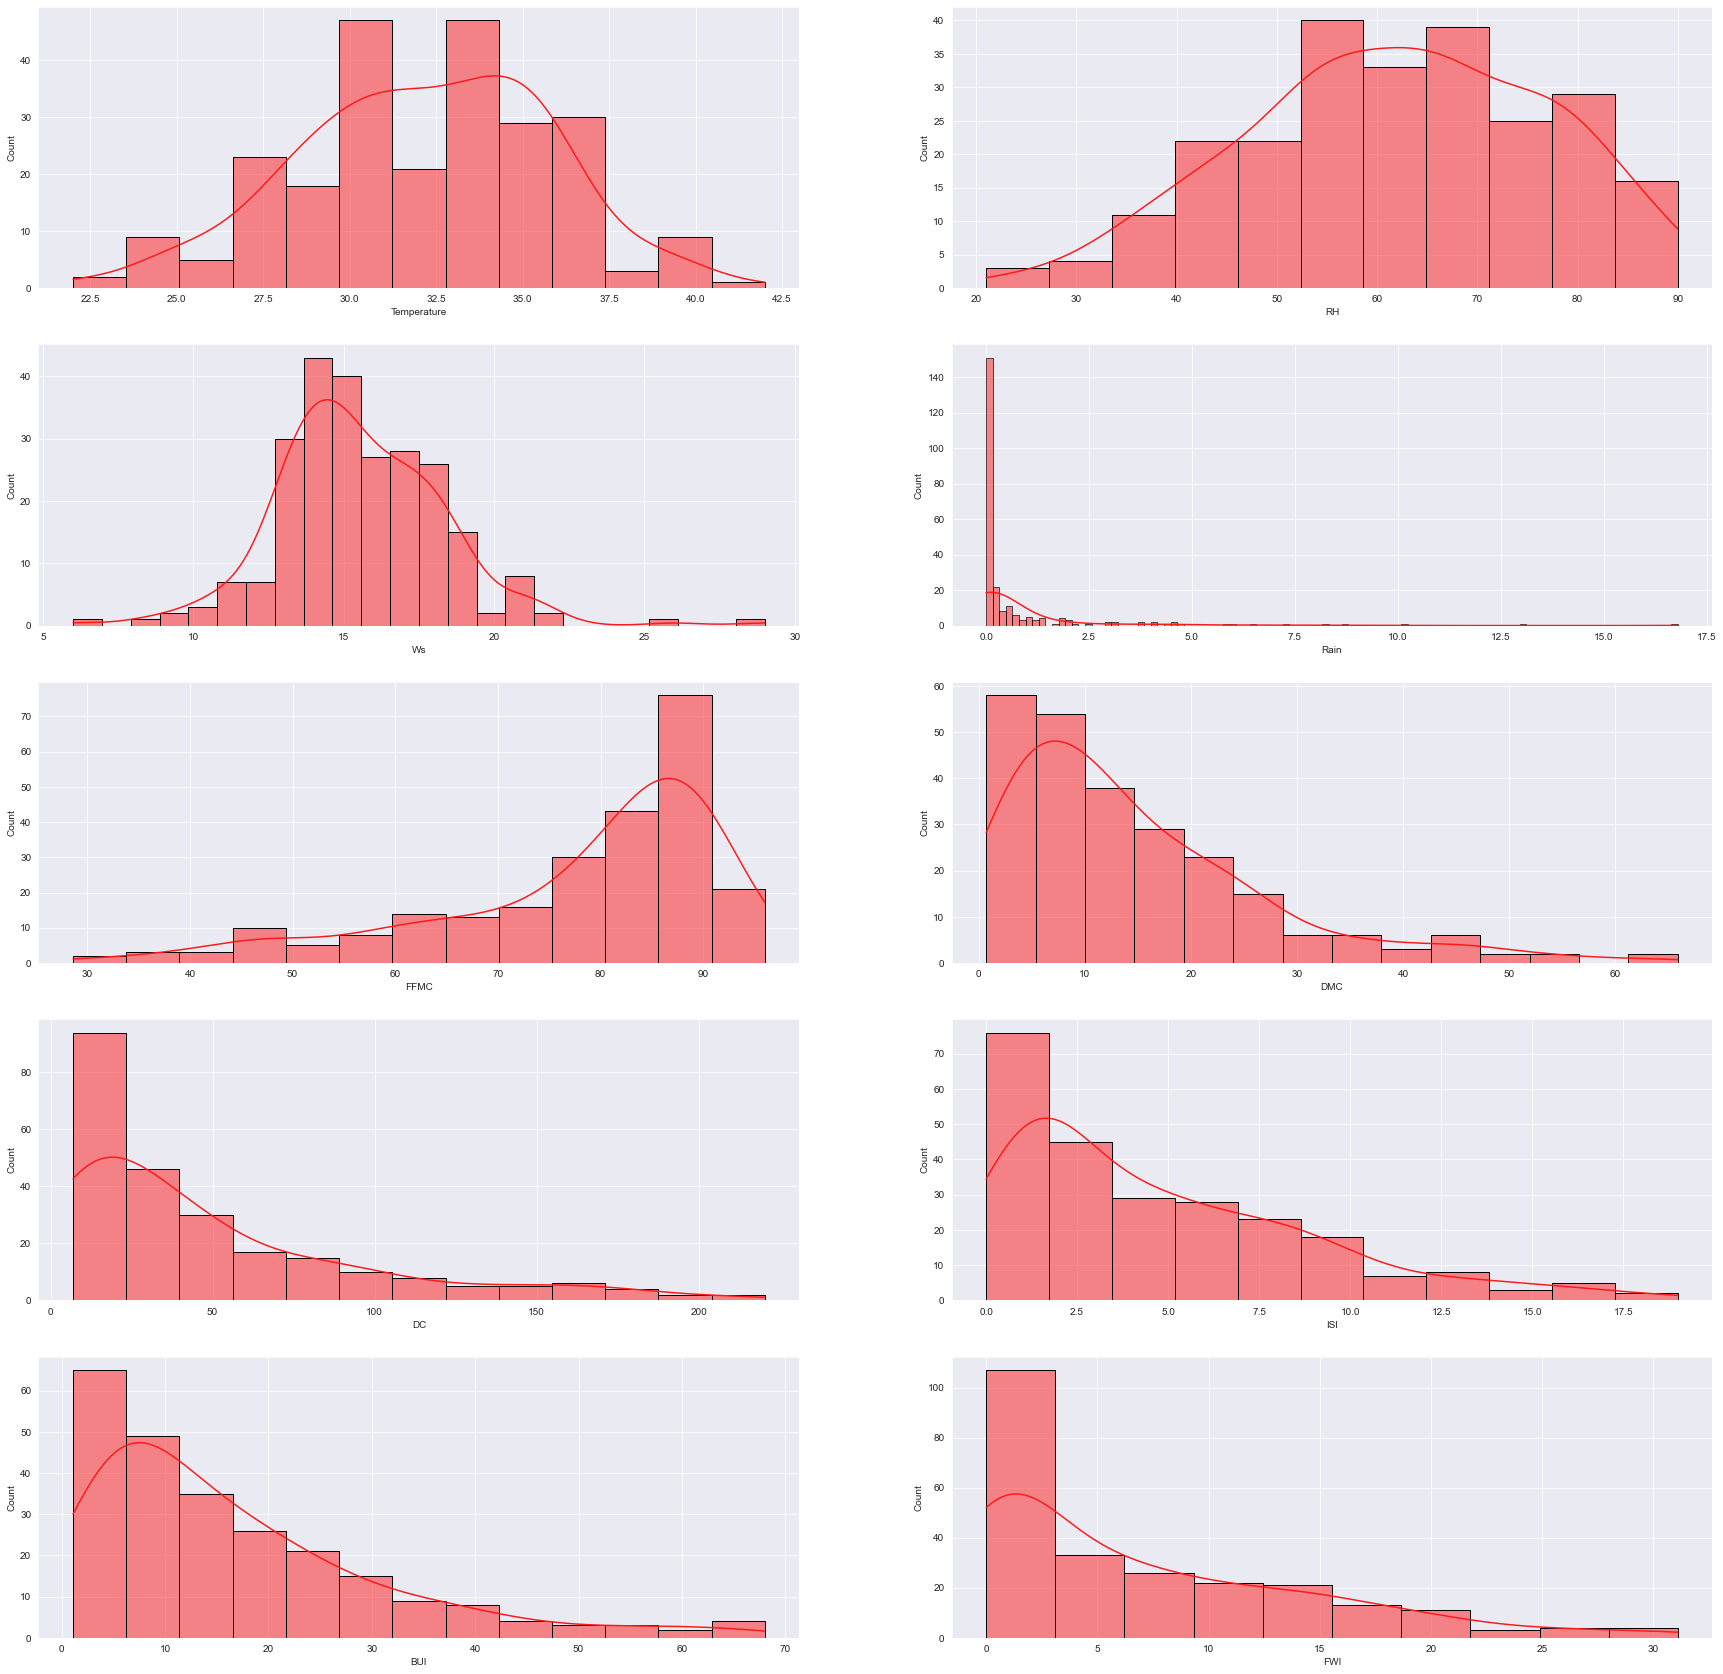

In [110]:
plt.figure(figsize=(30, 30))
#f,ax=plt.subplots(5,2,figsize=(20,20))
for i in range(1, len(numeric_features)):
    plt.subplot(5, 2, i+0)
    sns.histplot(data = df,x = df[numeric_features[i]],edgecolor='black',color='#ff1a1a',kde=True)
    


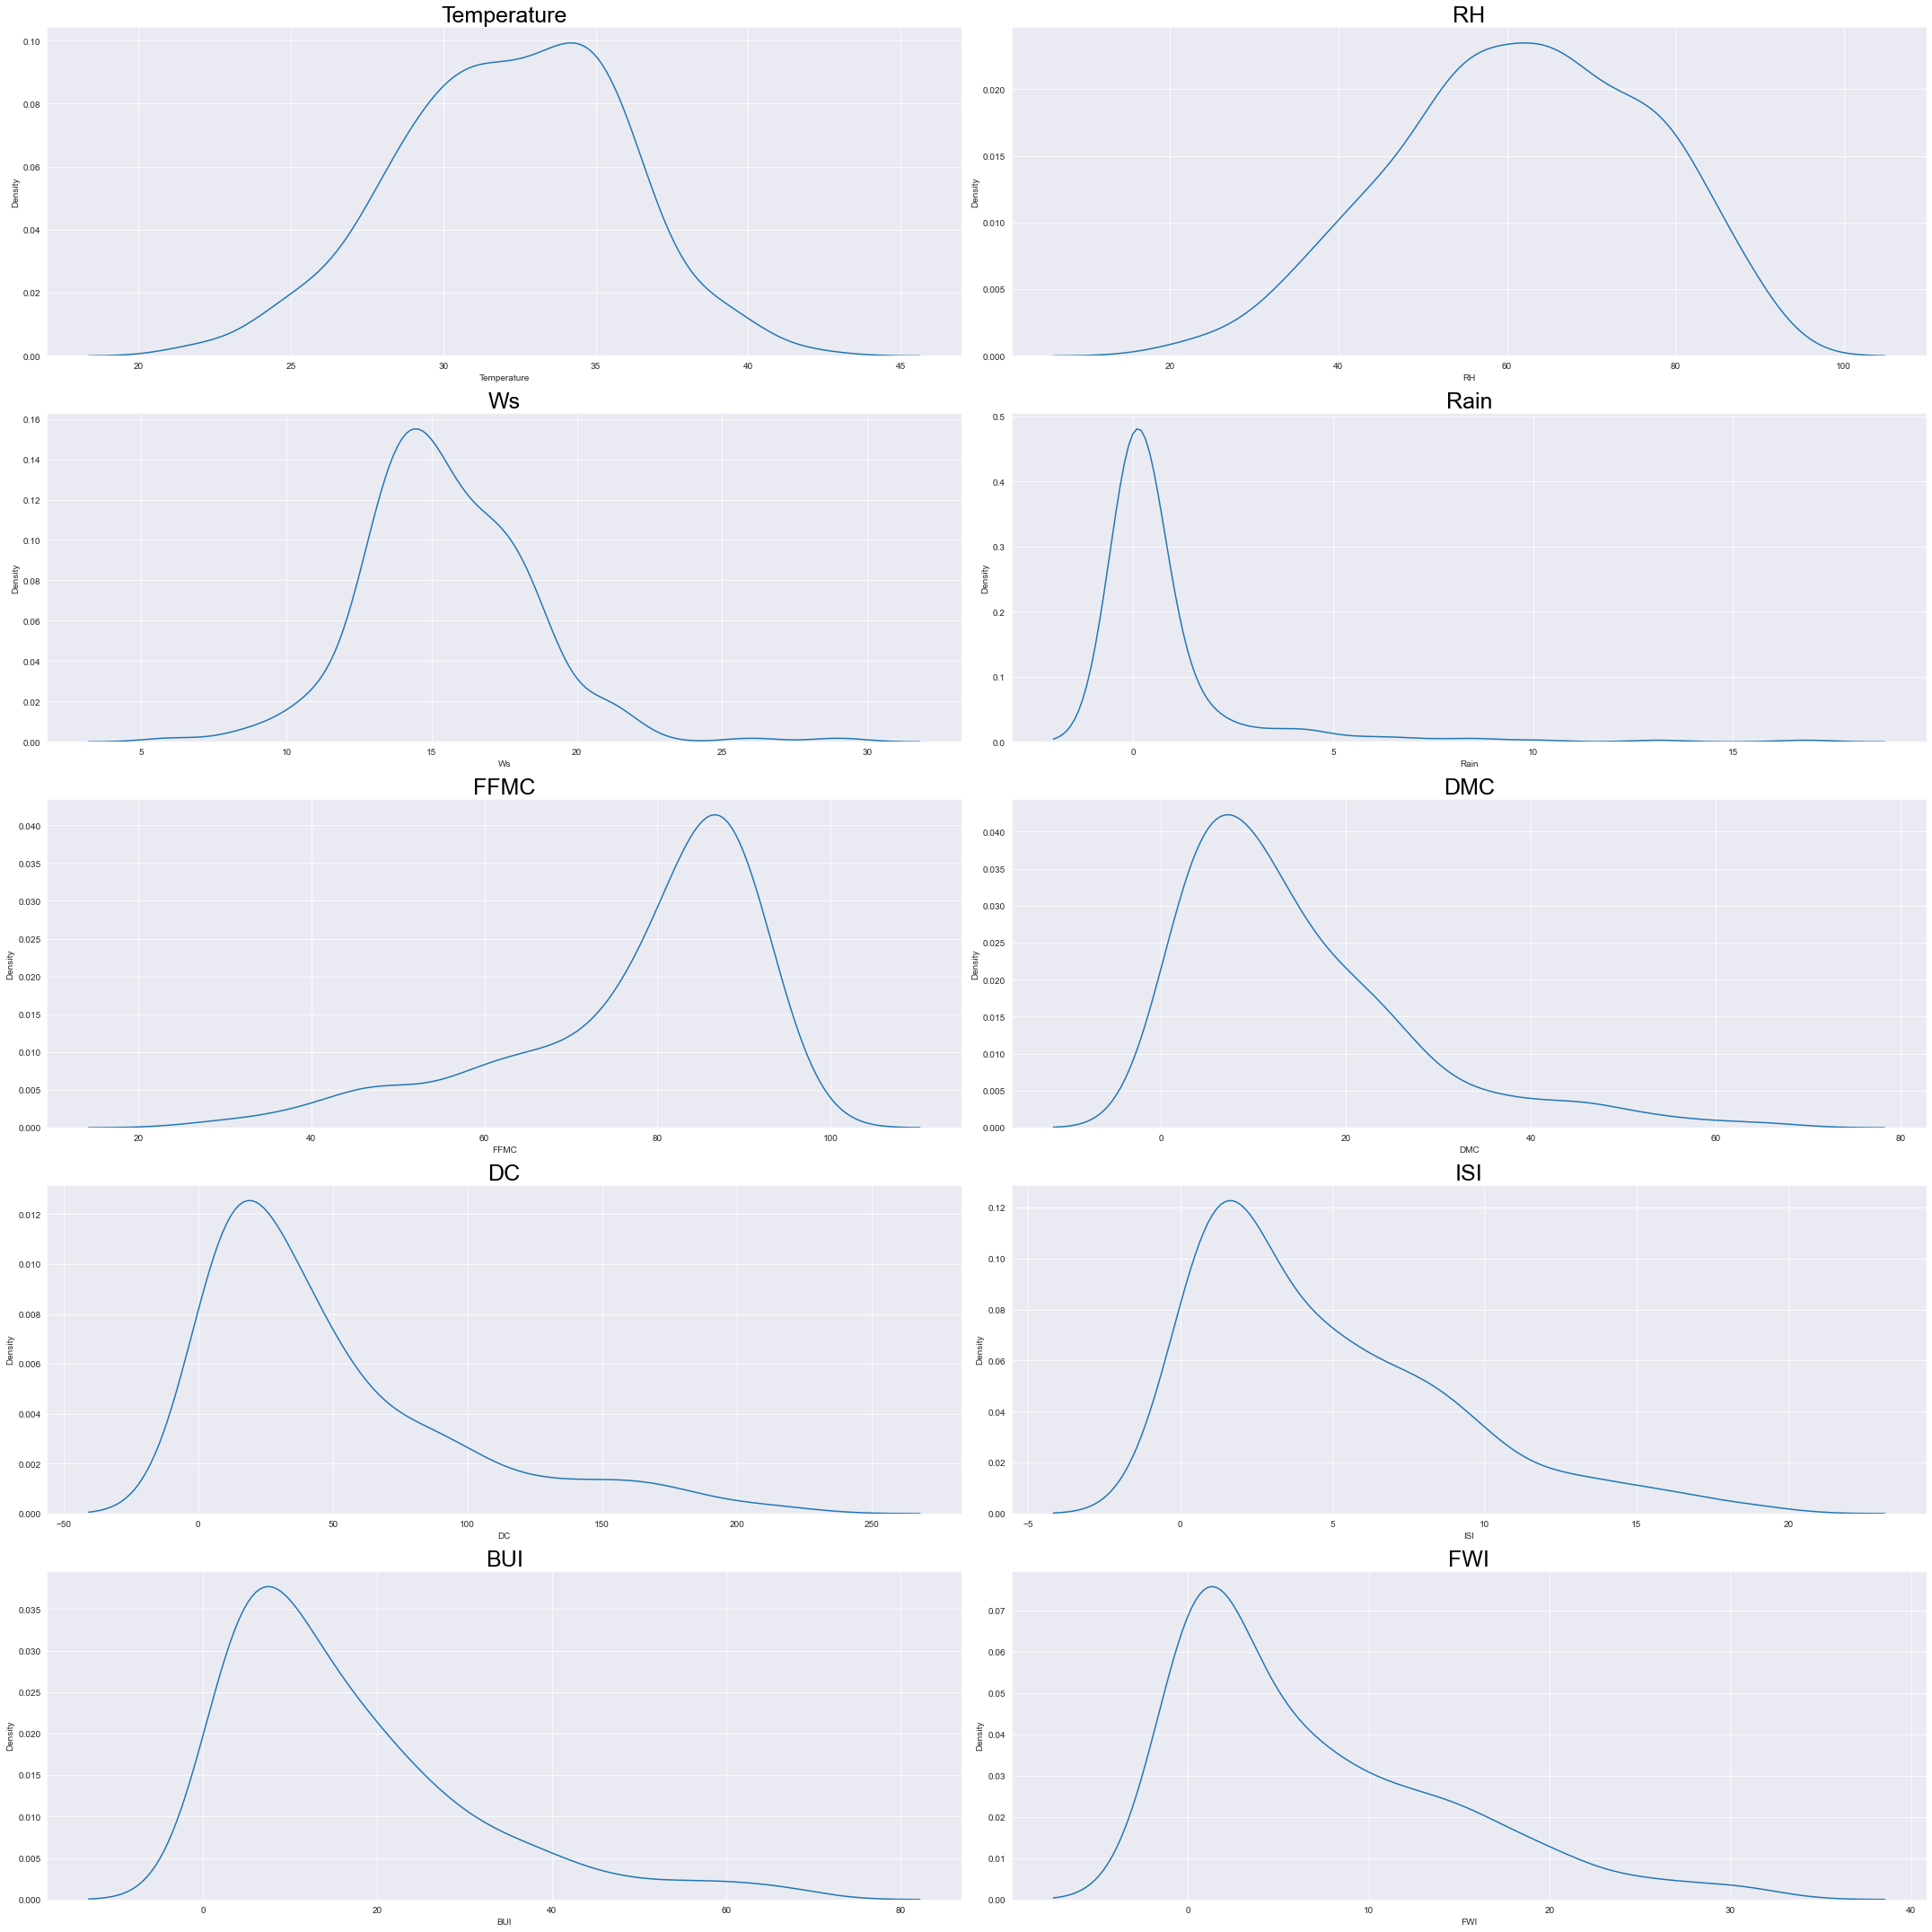

In [111]:
plt.figure(figsize=(30, 30))
#f,ax=plt.subplots(5,2,figsize=(20,20))
for i in range(1, len(numeric_features)):
    plt.subplot(5, 2, i+0)
    sns.kdeplot(data = df,x = df[numeric_features[i]])
    plt.title(numeric_features[i],color='black',size=25)
    plt.tight_layout()

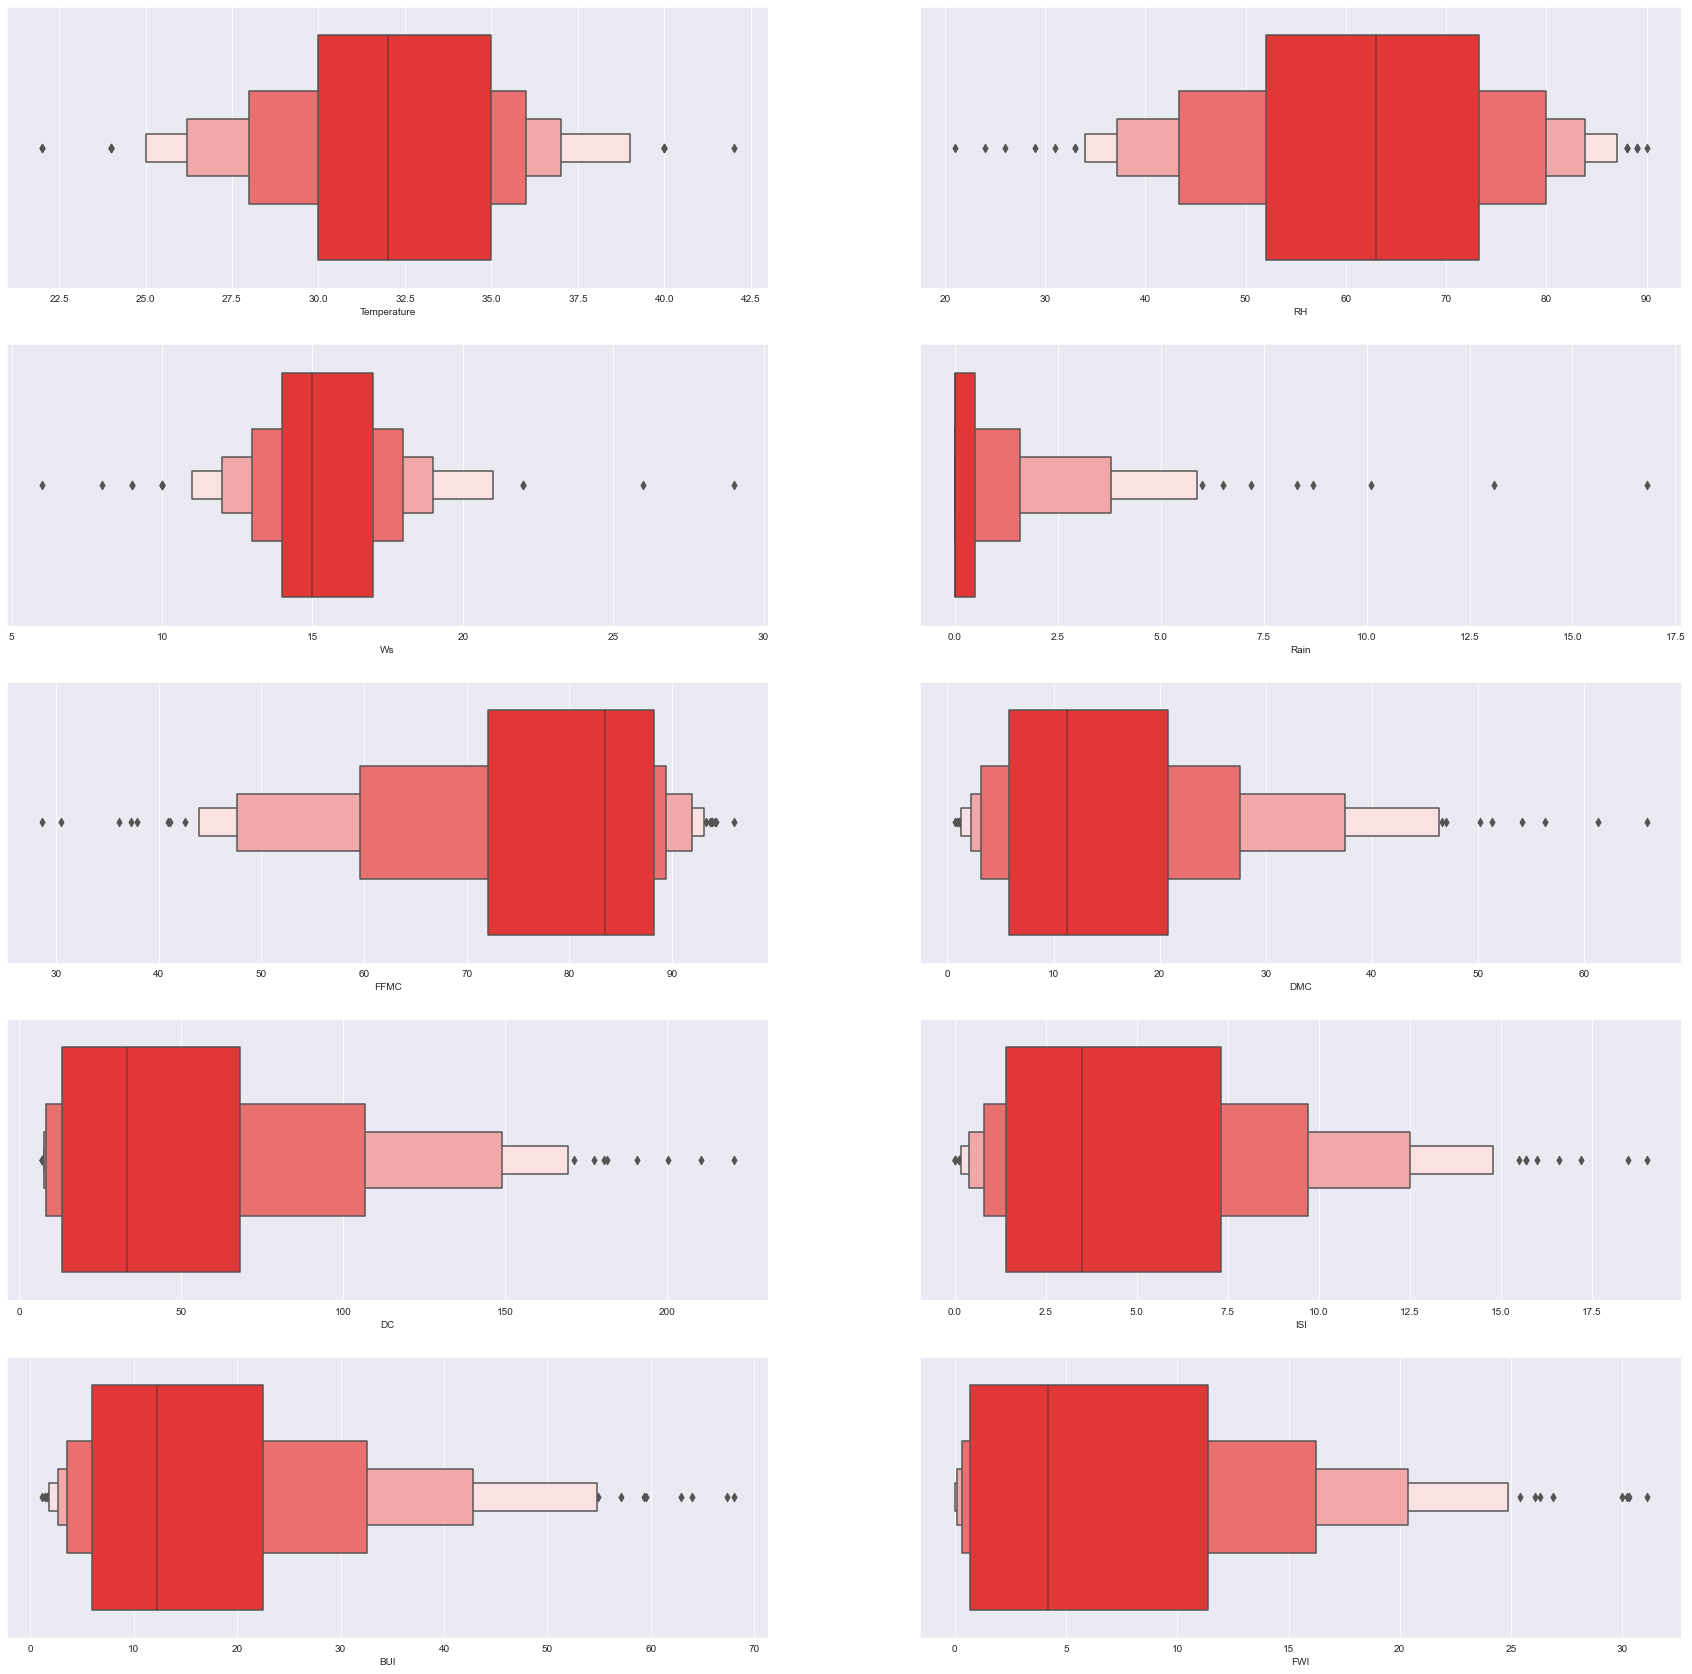

In [112]:
plt.figure(figsize=(30, 30))
#f,ax=plt.subplots(5,2,figsize=(20,20))
for i in range(1, len(numeric_features)):
    plt.subplot(5, 2, i+0)
    sns.boxenplot(data = df,x = df[numeric_features[i]],color='#ff1a1a')

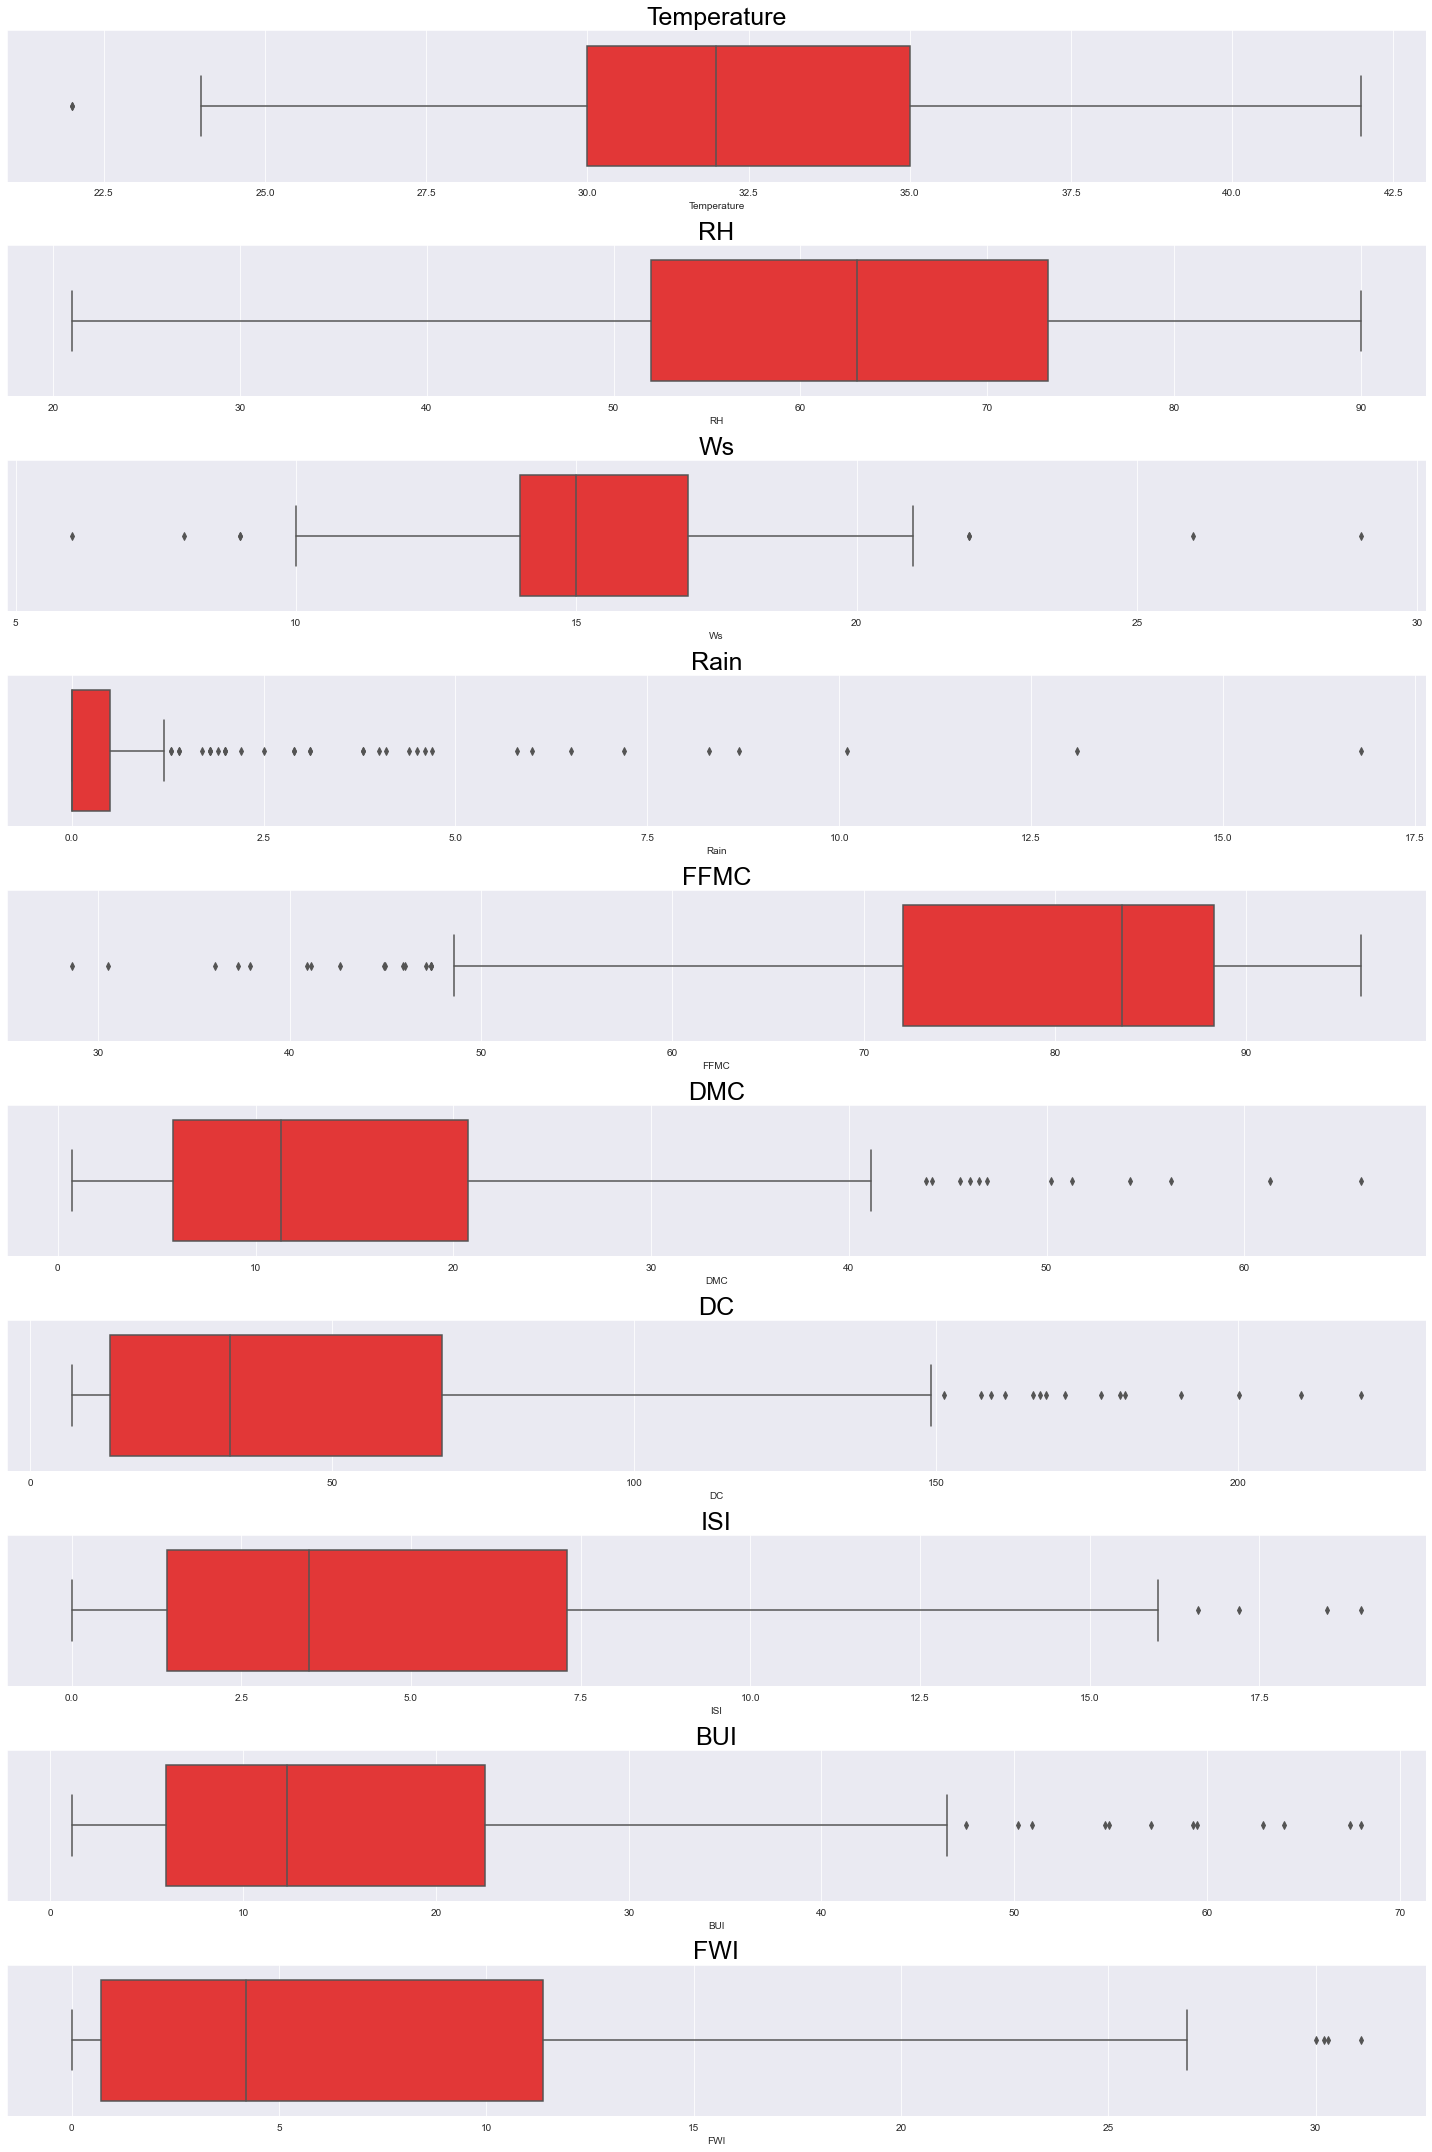

In [113]:
plt.figure(figsize=(20, 30))
#f,ax=plt.subplots(5,2,figsize=(20,20))
for i in range(1, len(numeric_features)):
    plt.subplot(10, 1, i+0)
    sns.boxplot(data = df,x = df[numeric_features[i]],color='#ff1a1a')
    plt.title(numeric_features[i],color='black',size=25)
    plt.tight_layout()

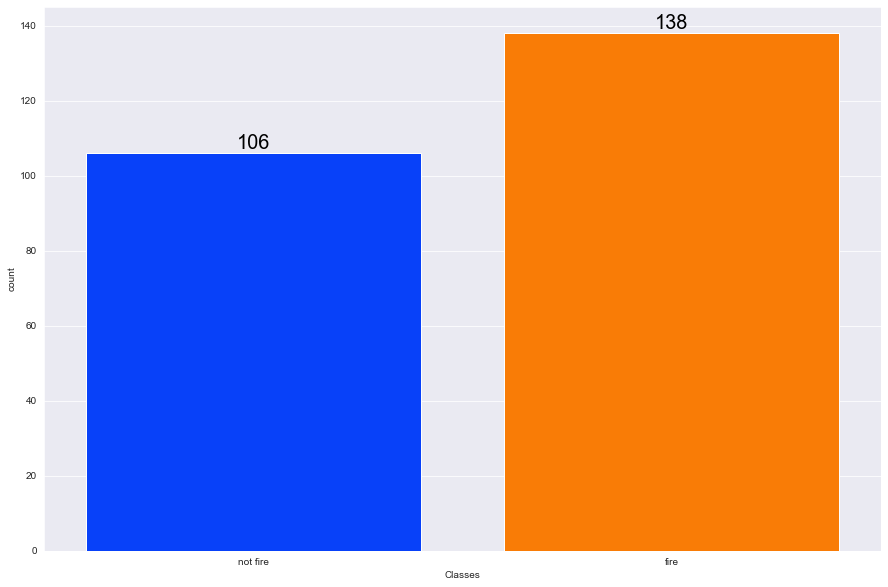

In [114]:
f,ax=plt.subplots(1,1,figsize=(15,10))
sns.countplot(x=df['Classes'],data=df,palette ='bright',saturation=0.95)
for container in ax.containers:
    ax.bar_label(container,color='black',size=20)

# bivariate analysis

<Figure size 1440x2160 with 0 Axes>

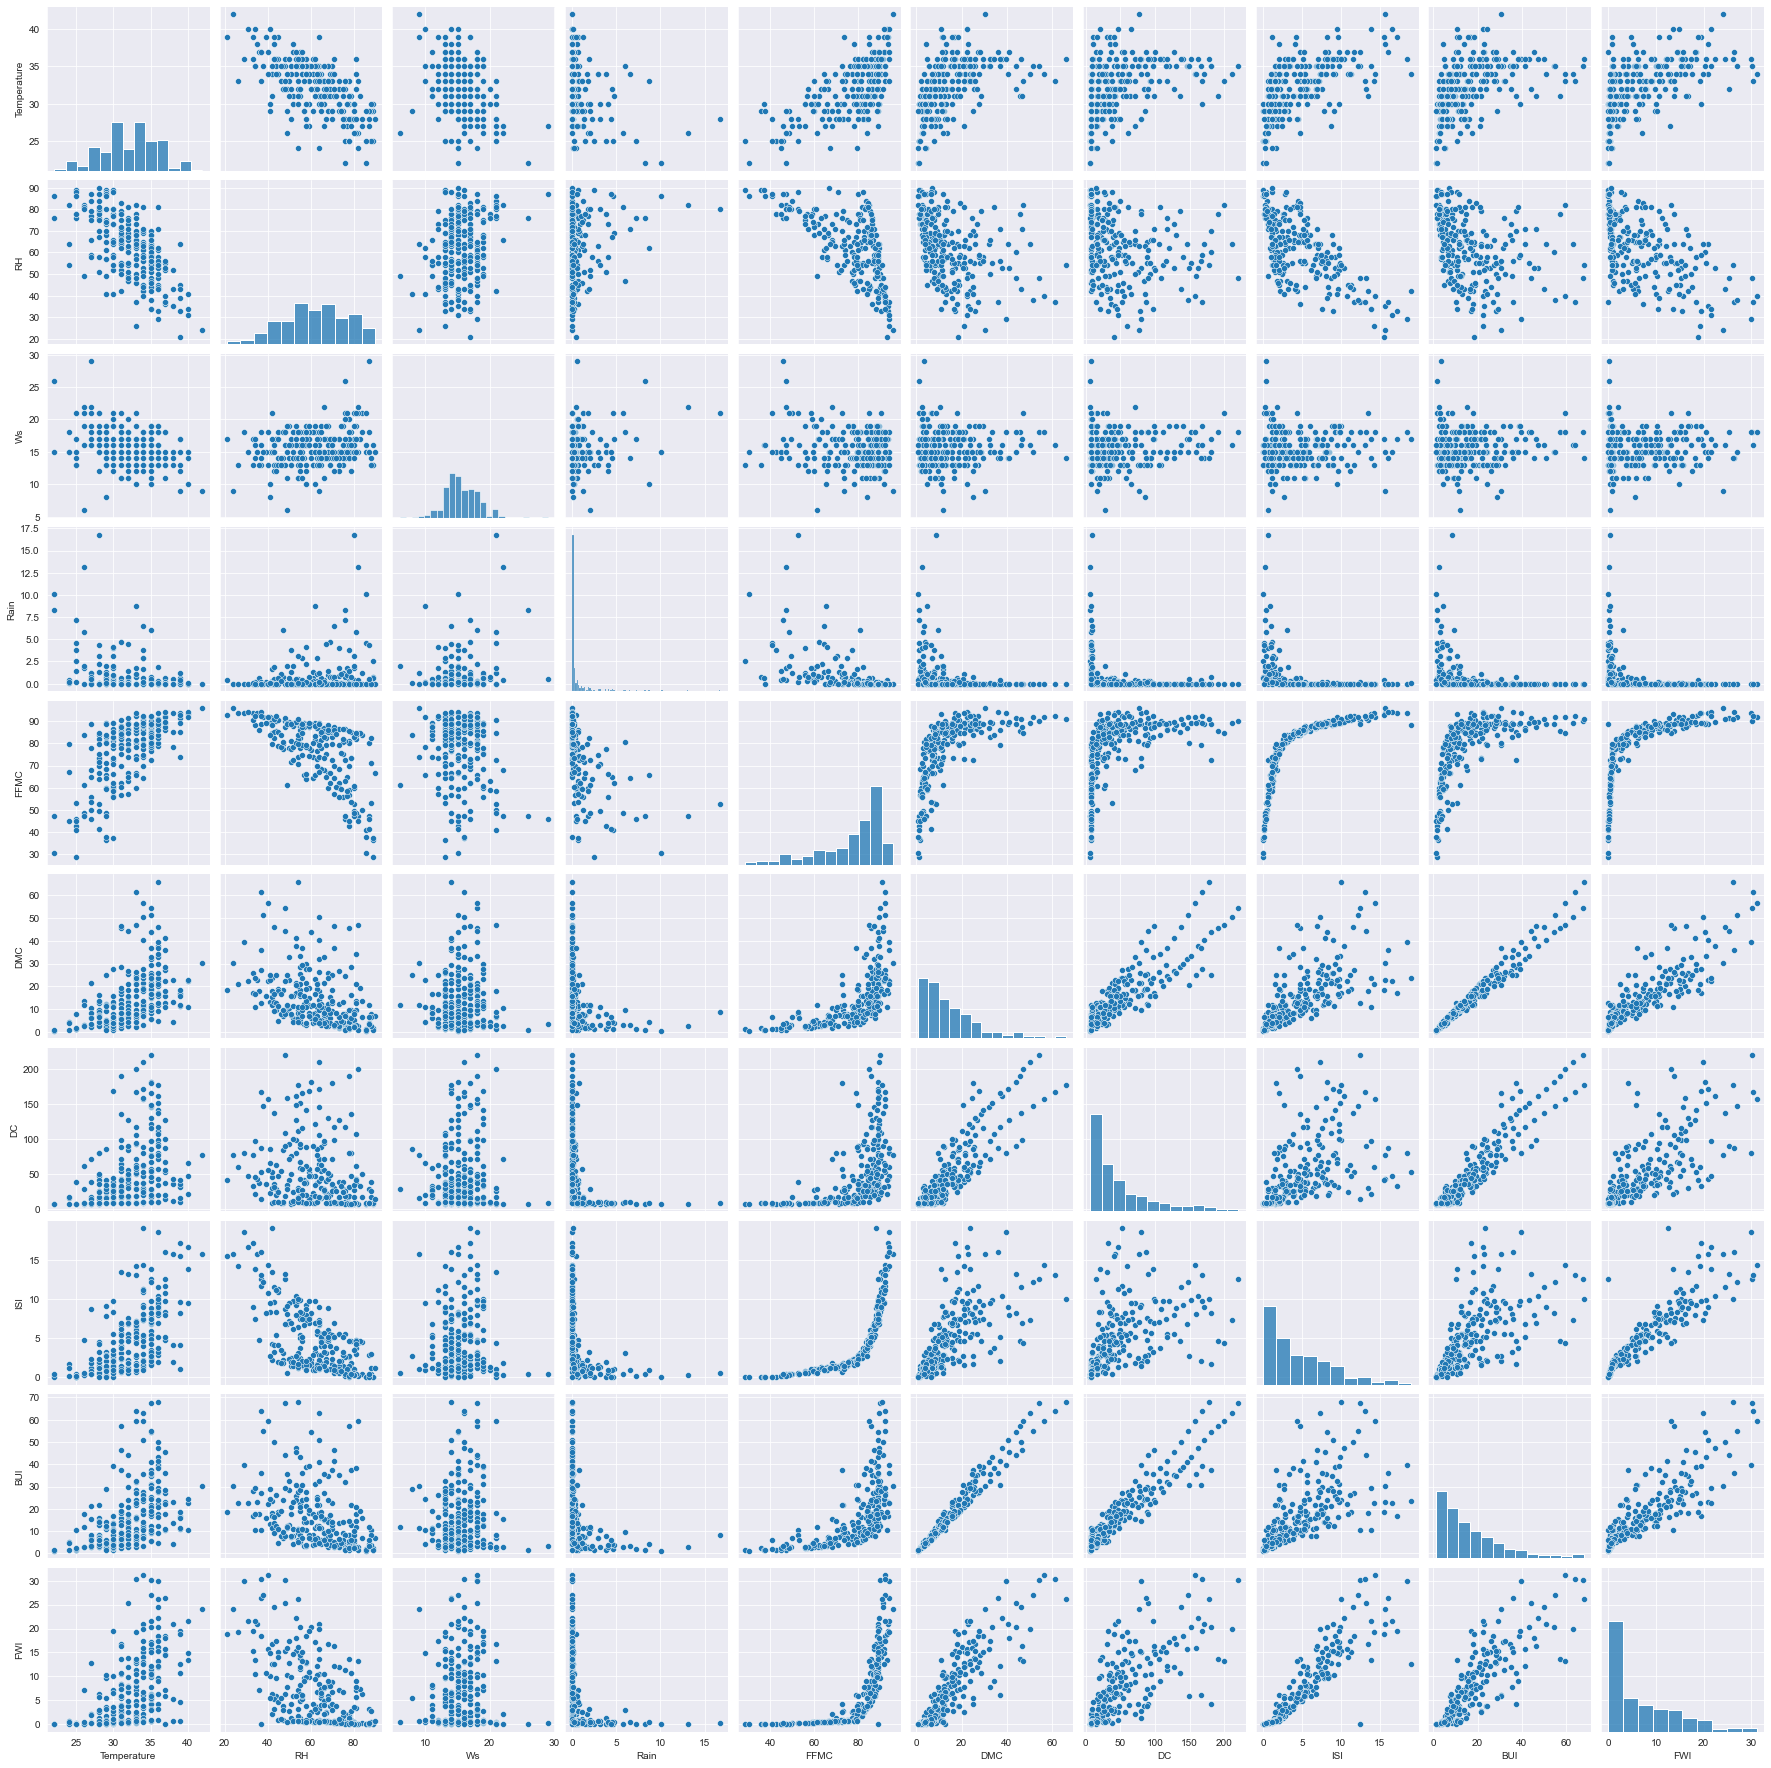

In [115]:
plt.figure(figsize=(20, 30))
sns.pairplot(df)

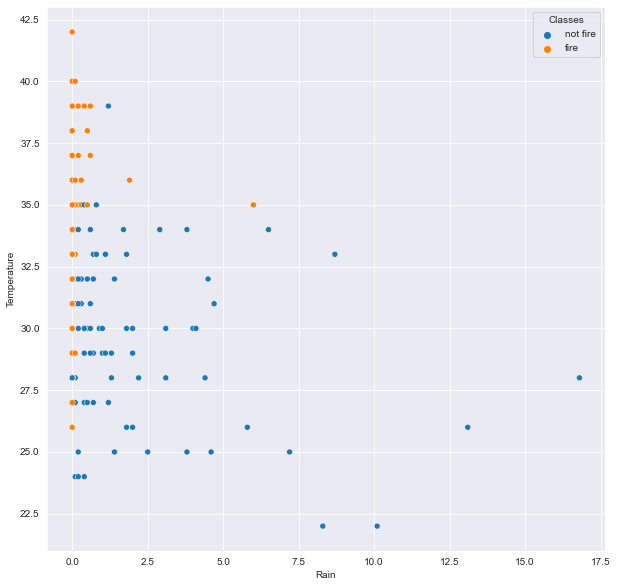

In [116]:
plt.figure(figsize=(10, 10))
sns.scatterplot(df["Rain"], df["Temperature"], hue=df["Classes"])
plt.show()

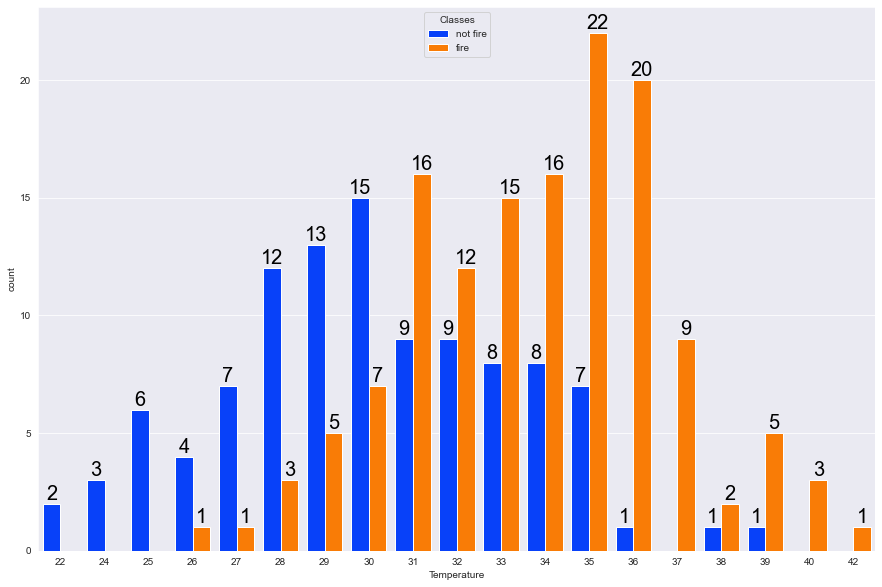

In [117]:
f,ax=plt.subplots(1,1,figsize=(15,10))
sns.countplot(x=df['Temperature'],data=df,palette ='bright',saturation=0.95,hue='Classes')
for container in ax.containers:
    ax.bar_label(container,color='black',size=20)

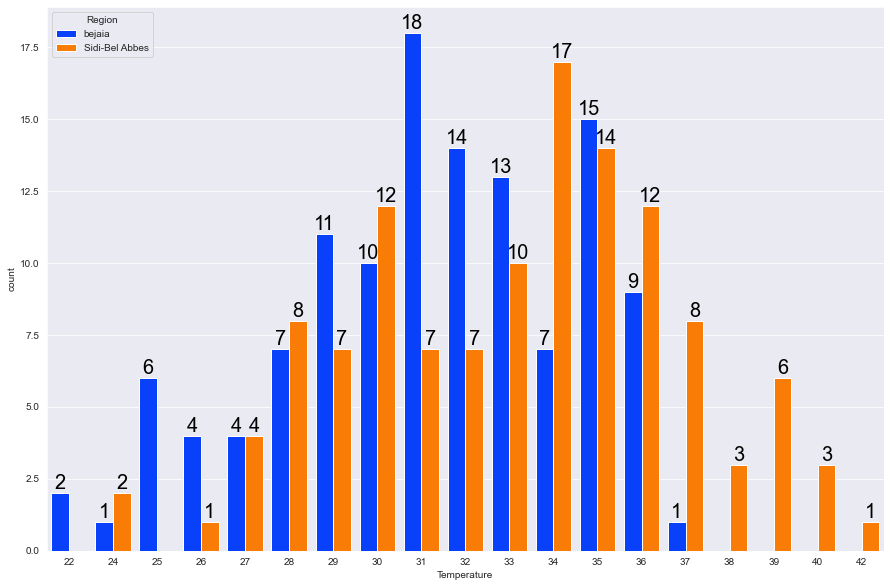

In [118]:
f,ax=plt.subplots(1,1,figsize=(15,10))
sns.countplot(x=df['Temperature'],data=df,palette ='bright',saturation=0.95,hue='Region')
for container in ax.containers:
    ax.bar_label(container,color='black',size=20)

<AxesSubplot:xlabel='Rain', ylabel='Ws'>

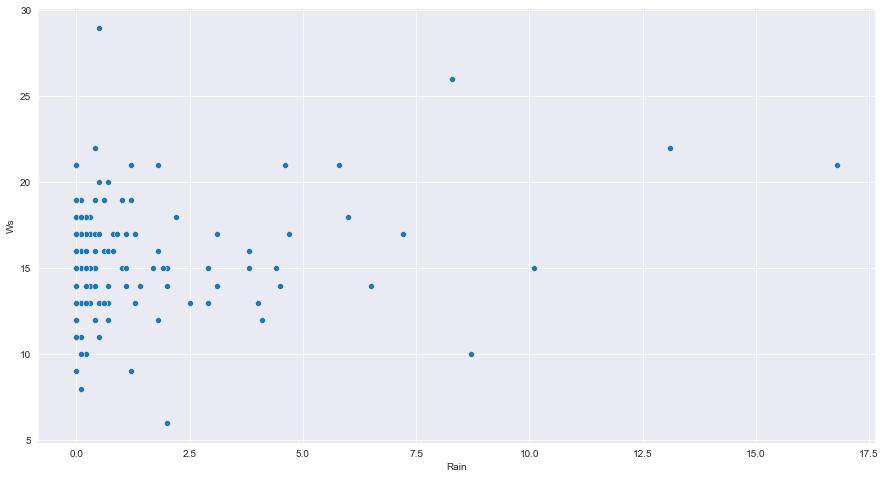

In [119]:
f,ax=plt.subplots(1,1,figsize=(15,8))
sns.scatterplot('Rain', 'Ws', data=df)

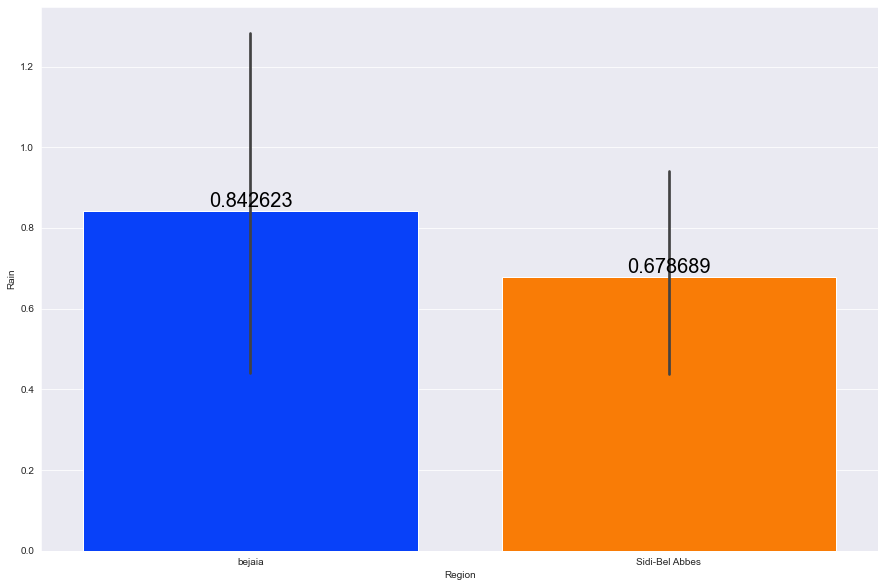

In [120]:
f,ax=plt.subplots(1,1,figsize=(15,10))
sns.barplot(x='Region',y='Rain',data=df,palette ='bright',saturation=0.95)
for container in ax.containers:
    ax.bar_label(container,color='black',size=20)

<AxesSubplot:>

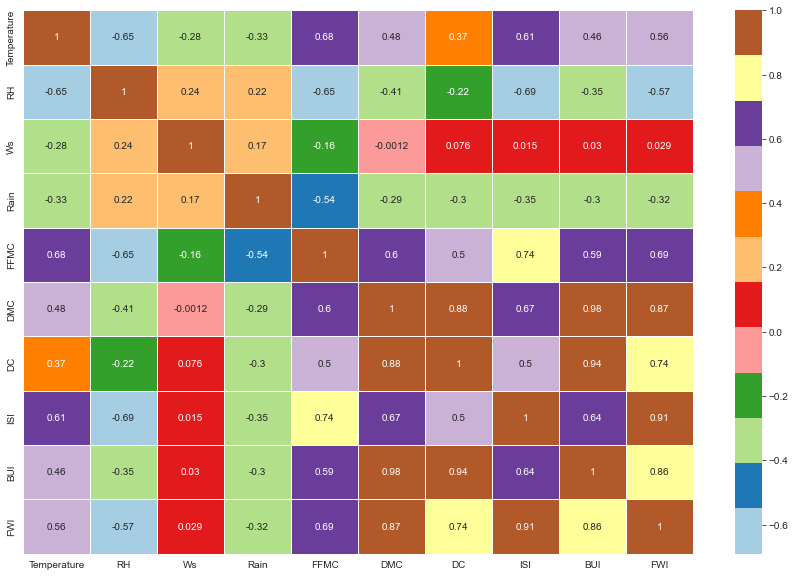

In [121]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot= True,linewidths=1, linecolor="white", cbar=True, 
            cmap = "Paired",xticklabels="auto", yticklabels="auto")

## if the corr between two features is more than 0.95 in that case we will take one of them.

In [122]:
data=df

# Applying Label encoding:

In [123]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()
df['Region']=LabelEncoder.fit_transform(df['Region'])
df['Classes']=LabelEncoder.fit_transform(df['Classes'])
# encoding technique:
    # not fire = 0
    # fire = 1

In [124]:
df

,date,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,2012-06-01,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,1
1,2012-06-02,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,1
2,2012-06-03,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,1
3,2012-06-04,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,1
4,2012-06-05,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2012-09-26,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,0
240,2012-09-27,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,0
241,2012-09-28,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,0
242,2012-09-29,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,0


In [125]:
## Independent Features

x=pd.DataFrame(df, columns=['RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Region','Classes'])  

## Dependent Features

y=pd.DataFrame(df,columns=['Temperature'])

# TrainTest Split:

In [126]:
x

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,1
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,1
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,1
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,1
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...
239,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,0
240,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
241,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
242,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [127]:
y

,Temperature
0,29
1,29
2,26
3,25
4,27
...,...
239,30
240,28
241,27
242,24


In [128]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=10)

In [129]:
# Independent Train Dataset
x_train

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
237,49,6,2.0,61.3,11.9,28.1,0.6,11.9,0.4,0,1
78,54,18,0.0,89.4,20.0,110.9,9.7,27.5,16.1,1,0
25,64,18,0.0,86.8,17.8,71.8,6.7,21.6,10.6,1,0
124,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0,1
176,64,9,1.2,73.8,11.7,15.9,1.1,11.4,0.7,0,1
...,...,...,...,...,...,...,...,...,...,...,...
64,69,13,0.0,85.0,8.2,19.8,4.0,8.2,3.9,1,0
15,89,13,0.7,36.1,1.7,7.6,0.0,2.2,0.0,1,1
228,51,13,0.0,88.7,16.0,50.2,6.9,17.8,9.8,0,0
125,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0,1


In [130]:
x_train.shape

(163, 11)

In [131]:
# Independent Test Dataset
x_test

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
162,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,0,1
60,64,17,0.0,87.2,31.9,145.7,6.8,41.2,15.7,1,0
61,45,14,0.0,78.8,4.8,10.2,2.0,4.7,0.9,1,1
63,63,14,0.3,76.6,5.7,10.0,1.7,5.5,0.8,1,1
69,59,17,0.0,87.4,14.8,57.0,6.9,17.9,9.9,1,0
...,...,...,...,...,...,...,...,...,...,...,...
169,68,15,0.0,86.1,23.9,51.6,5.2,23.9,9.1,0,0
232,41,8,0.1,83.9,24.9,86.0,2.7,28.9,5.6,0,0
144,59,16,0.8,74.2,7.0,8.3,1.6,6.7,0.8,0,1
208,37,16,0.0,92.2,61.3,167.2,13.1,64.0,30.3,0,0


In [132]:
x_test.shape

(81, 11)

In [133]:
# Dependent Train Dataset
y_train

,Temperature
237,26
78,36
25,31
124,29
176,39
...,...
64,34
15,29
228,32
125,30


In [134]:
y_train.shape

(163, 1)

In [135]:
# Dependent Test Dataset
y_test

,Temperature
162,34
60,35
61,36
63,35
69,35
...,...
169,33
232,29
144,33
208,33


In [136]:
y_test.shape

(81, 1)

# Multicollinearity

In [137]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [138]:
vif = pd.DataFrame()
vif["variables"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif)

   variables         VIF
0         RH   30.538818
1         Ws   37.979593
2       Rain    1.548611
3       FFMC   36.879593
4        DMC  204.499615
5         DC   51.505462
6        ISI   35.650940
7        BUI  412.883857
8        FWI   48.023563
9     Region    3.238220
10   Classes    4.002573


# Standardizing or Feature Scaling
 ### to bring all the features in same unit.

In [139]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()  ## Initialising

In [140]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


# differenc between fit_transform and transform
* whenever will do fit_transform on x_train data it will calulate mean and standerd diviation and apply z-score formula.
* whenever will do transform on x_test data it will using same mean and standerd diviation which we got from trainig data.
* we will be using training mean and standerd diviation for transform this also.
## To avoid data leakage

In [141]:
x_train

array([[-0.85631108, -3.36419461,  0.88853946, ..., -0.85589384,
        -0.98176139,  1.06992376],
       [-0.52508491,  0.99944243, -0.441414  , ...,  1.21984339,
         1.01857744, -0.93464604],
       [ 0.13736742,  0.99944243, -0.441414  , ...,  0.4926743 ,
         1.01857744, -0.93464604],
       ...,
       [-0.72382061, -0.81873967, -0.441414  , ...,  0.38690425,
        -0.98176139, -0.93464604],
       [ 0.13736742, -0.45510325, -0.441414  , ..., -0.7765663 ,
        -0.98176139,  1.06992376],
       [ 1.13104591, -1.18237609, -0.441414  , ..., -0.78978756,
         1.01857744,  1.06992376]])

In [142]:
x_test

array([[-3.92594448e-01, -9.14668296e-02,  1.48701853e+00,
        -1.82411230e-01, -6.02677495e-01, -8.21344278e-01,
        -7.33442383e-01, -6.82030988e-01, -8.03008814e-01,
        -9.81761387e-01,  1.06992376e+00],
       [ 1.37367416e-01,  6.35806011e-01, -4.41414004e-01,
         6.64566895e-01,  1.37979749e+00,  2.03375301e+00,
         4.94418103e-01,  1.72378441e+00,  1.16695836e+00,
         1.01857744e+00, -9.34646039e-01],
       [-1.12129201e+00, -4.55103250e-01, -4.41414004e-01,
         9.08075201e-02, -7.86536062e-01, -8.06670504e-01,
        -6.38991577e-01, -8.28897625e-01, -7.89787558e-01,
         1.01857744e+00,  1.06992376e+00],
       [ 7.11221826e-02, -4.55103250e-01, -2.41920984e-01,
        -5.94627923e-02, -7.14591405e-01, -8.10863011e-01,
        -7.09829682e-01, -7.72948430e-01, -8.03008814e-01,
         1.01857744e+00,  1.06992376e+00],
       [-1.93858749e-01,  6.35806011e-01, -4.41414004e-01,
         6.78227832e-01,  1.28490116e-02,  1.74376141e-01,
  

# Model Training

In [143]:

from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [144]:
print(regression.coef_)

[[-1.23349039 -0.53324314 -0.25439444  0.87491349 -0.05255217  0.84927118
   0.38901988 -0.22782581 -0.36761655 -0.25669927 -0.170551  ]]


In [145]:
print(regression.intercept_)

[32.17791411]


In [146]:
# Precdiction for Test Data
reg_pred=regression.predict(x_test)
reg_pred

array([[31.74199513],
       [33.28642123],
       [33.13835005],
       [31.44250999],
       [32.86199162],
       [34.68348484],
       [33.72966333],
       [34.57379048],
       [31.95964401],
       [32.87057735],
       [33.73315238],
       [27.61182472],
       [35.44380643],
       [29.51142377],
       [32.05337148],
       [32.13686638],
       [34.30825757],
       [28.05938126],
       [36.01188438],
       [34.27318953],
       [32.71778941],
       [34.4780063 ],
       [33.47774217],
       [32.99297035],
       [35.91902796],
       [29.03660725],
       [32.53647327],
       [32.69240114],
       [27.58288684],
       [32.29322995],
       [25.93545388],
       [27.37215351],
       [33.83963318],
       [31.96007755],
       [32.87929046],
       [30.81402622],
       [28.9111015 ],
       [32.83540527],
       [27.72324757],
       [35.31517892],
       [32.62769454],
       [34.06788216],
       [33.95912435],
       [31.63134179],
       [36.47336722],
       [33

# Performance Metrics:

In [150]:
# Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('mean_squared_error:',mean_squared_error(y_test,reg_pred))
print('mean_absolute_error:',mean_absolute_error(y_test,reg_pred))
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,reg_pred)))

mean_squared_error: 7.136405112833756
mean_absolute_error: 2.185409846712341
mean_squared_error: 2.6714050821307045


# Accuracy:

In [151]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5280901253270347


In [181]:
 print('Adjested r score:',1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

Adjested r score: 0.45285811632119966


In [157]:
print('Train accuracy:',regression.score(x_train, y_train))

Train accuracy: 0.5768965939414534


In [159]:
print('Test accuracy:',regression.score(x_test, y_test))

Test accuracy: 0.5280901253270347


In [154]:
#Actual value and the predicted value
diff = pd.DataFrame()
diff['Actual value']=y_test
diff['Predicted value']=reg_pred

In [155]:
diff

,Actual value,Predicted value
162,34,31.741995
60,35,33.286421
61,36,33.138350
63,35,31.442510
69,35,32.861992
...,...,...
169,33,32.602946
232,29,36.487167
144,33,31.602993
208,33,36.263933


# Assumption of Linear Regression:

# 1. Linear Relationship

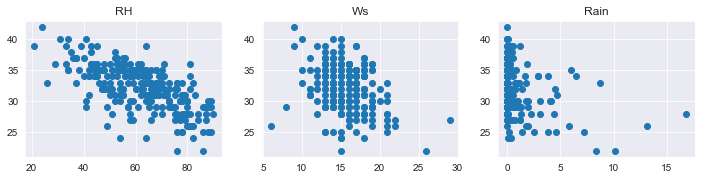

In [161]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))
# RH	Ws	Rain	FFMC	DMC
ax1.scatter(df['RH'], df['Temperature'])
ax1.set_title("RH")
ax2.scatter(df['Ws'], df['Temperature'])
ax2.set_title("Ws")
ax3.scatter(df['Rain'], df['Temperature'])
ax3.set_title("Rain")

plt.show()

# 2. Multicollinearity

In [162]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["variables"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif)

   variables         VIF
0         RH   30.538818
1         Ws   37.979593
2       Rain    1.548611
3       FFMC   36.879593
4        DMC  204.499615
5         DC   51.505462
6        ISI   35.650940
7        BUI  412.883857
8        FWI   48.023563
9     Region    3.238220
10   Classes    4.002573


<AxesSubplot:>

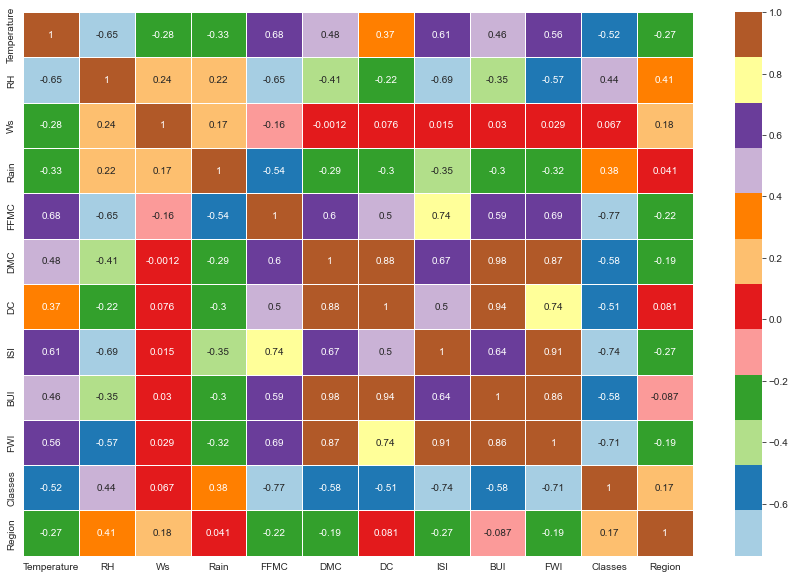

In [163]:
# Another Technique
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot= True,linewidths=1, linecolor="white", cbar=True, 
            cmap = "Paired",xticklabels="auto", yticklabels="auto")

# 3. Normality of Residual

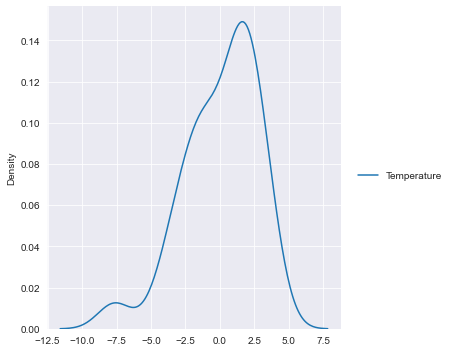

In [165]:
residual = y_test - reg_pred
sns.displot(residual,kind='kde')

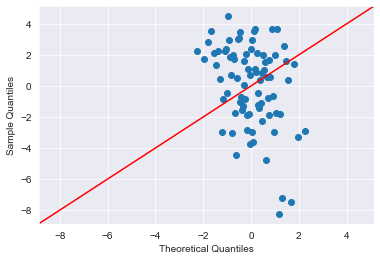

In [175]:
# Another Technique
# QQ Plot
import statsmodels.api as sm
import pylab as py
sm.qqplot(residual, line ='45')
plt.show()

# 4. Homoscedasticity:

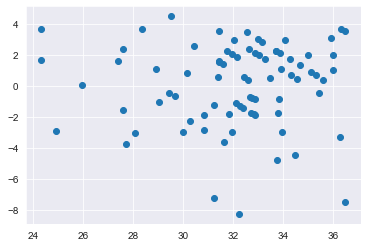

In [177]:
plt.scatter(reg_pred,residual)

# 5. Autocorrelation of Residuals:

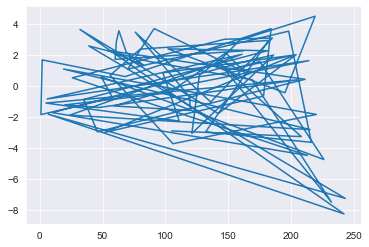

In [178]:
plt.plot(residual)

# Ridge regression:

In [184]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [189]:
print('slope:',ridge.coef_)
print('intercept:',ridge.intercept_)

slope: [[-1.22495479 -0.53179979 -0.25730035  0.872873   -0.12585405  0.75949142
   0.36013808 -0.08448438 -0.32477294 -0.25325181 -0.16852792]]
intercept: [32.17791411]


In [190]:
ridge_pred=ridge.predict(x_test)

In [191]:
# Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('mean_squared_error:',mean_squared_error(y_test,ridge_pred))
print('mean_absolute_error:',mean_absolute_error(y_test,ridge_pred))
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,ridge_pred)))

mean_squared_error: 7.130643937689946
mean_absolute_error: 2.1853019161608205
mean_squared_error: 2.6703265601214294


In [194]:
from sklearn.metrics import r2_score
score=r2_score(y_test,ridge_pred)
print('r2_score',score)

r2_score 0.5284710952127261


In [195]:
 print('Adjested r score:',1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

Adjested r score: 0.453299820536494


# Lasso regression:

# What is Lasso Regression?
* Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage.
* This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

In [196]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)

Lasso()

In [197]:
print('slope:',lasso.coef_)
print('intercept:',lasso.intercept_)

slope: [-0.71955751 -0.         -0.          0.89582004  0.          0.
  0.          0.          0.         -0.         -0.        ]
intercept: [32.17791411]


In [199]:
lasso_pred=lasso.predict(x_test)

In [200]:
# Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('mean_squared_error:',mean_squared_error(y_test,lasso_pred))
print('mean_absolute_error:',mean_absolute_error(y_test,lasso_pred))
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,lasso_pred)))

mean_squared_error: 9.10609532182792
mean_absolute_error: 2.4978660766652743
mean_squared_error: 3.0176307464346794


In [201]:
from sklearn.metrics import r2_score
score=r2_score(y_test,lasso_pred)
print('r2_score',score)

r2_score 0.39784019626969913


In [202]:
 print('Adjested r score:',1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

Adjested r score: 0.301843705819941
